# Data Science e Machine Learning na Prática - Introdução e Aplicações na Indústria de Processos

### Notebook 4 - O problema de regressão

por [Afrânio](http://afrjr.weebly.com) - [afraeq@gmail.com](mailto:afraeq@gmail.com)

[Escola Piloto Prof. Giulio Massarani](http://www.escolapiloto.peq.coppe.ufrj.br/) - [Programa de Engenharia Química, COPPE, UFRJ](http://portal.peq.coppe.ufrj.br/) - 2019

Neste [notebook](http://jupyter.org/), o estudo do problema de regressão é realizado utilizando os conjuntos de dados [Boston Housing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) e [Diabetes](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). 

Conceitos importantes a aprender:

* o problema de regressão;
* erro absoluto médio (MAE) e outras métricas de acurácia.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### O conjunto de dados *Boston Housing Dataset*

* O conjunto de dados *Boston Housing* consiste do preço das casas de diferentes localidades em Boston, juntamente com outras características como taxa criminal (CRIM), idade dos donos da casa (AGE), etc. 

* Nosso objetivo é prever o preço de uma casa, dados todos os demais atributos.

* A previsão de uma variável contínua, dadas as informações dos seus atributos, constitui o problema da *regressão*.

* O problema da *regressão* é o análogo contínuo do problema de classificação.

### Importando os dados:

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

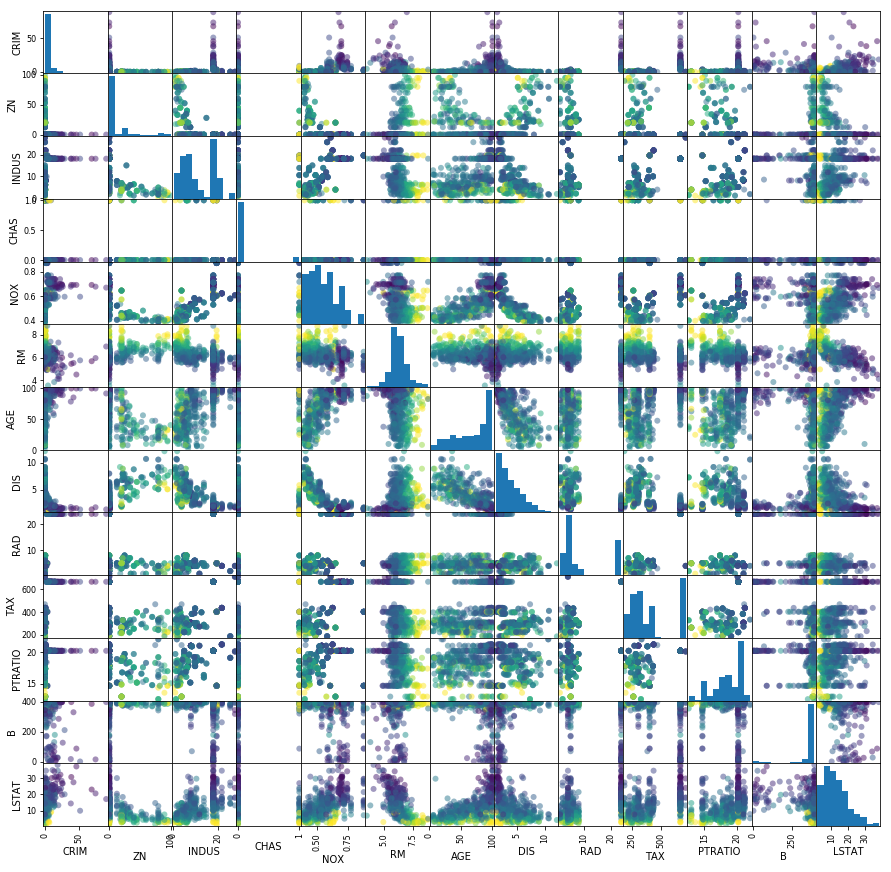

In [4]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

pd.plotting.scatter_matrix(boston_df, c=boston.target, figsize=(15, 15), marker='o');

### Separando em conjunto de treino e teste:

In [5]:
from sklearn.model_selection import train_test_split

X, y = boston['data'], boston['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


É muito importante lembrar-se que, no caso de problemas de regressão, o *target* $y$ é uma variável contínua (ao contrário do problema de classificação, em que $y$ é discreto).

### Comparação entre vários modelos de regressão

Na célula a seguir, vários modelos de regressão são aplicados e comparados utilizando a métrica de acurácia *Erro Absoluto Médio* (MAE). Essa métrica tem a vantagem de ser facilmente interpretada, por ter a mesma dimensão da variável predita original. É simplesmente o erro médio que se comete na previsão da variável.

Linear: 3.445, 0.496
Lasso: 3.714, 0.555
ElasticNet: 3.658, 0.541
KNN: 4.356, 0.782
DecisionTree: 2.965, 0.444
SVR: 6.254, 0.747
AdaBoost: 2.642, 0.454
GradientBoost: 2.126, 0.21
RandomForest: 2.407, 0.364
ExtraTrees: 2.289, 0.383


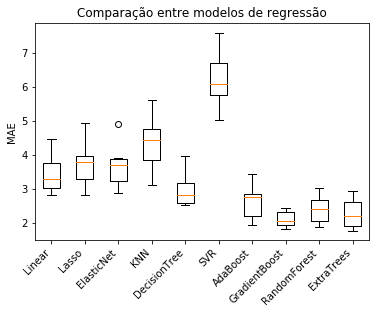

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# guardando diferentes modelos de regressão no dicionário 'models'
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

model_results = []
model_names   = []

for model_name in models:
    
    # efetuando a validação cruzada
    results = cross_val_score(models[model_name], X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    
    # guardando os resultados
    model_results.append(-results)
    model_names.append(model_name)
    
    # imprimindo resultados
    print("{}: {}, {}".format(model_name, round(-results.mean(), 3), round(results.std(), 3)))

# plotando resultados
fig, ax = plt.subplots()
ax.boxplot(model_results)

# formatando gráfico
ax.set_xticklabels(model_names, rotation = 45, ha="right")
ax.set_ylabel("MAE")
ax.set_title('Comparação entre modelos de regressão')
ax.margins(0.05, 0.05);

#### *Mão na massa! *

* Repita a análise acima, trocando a métrica de acurácia pelo coeficiente de determinação $R^2$. Essa métrica também é de fácil interpretação? Há diferença nos resultados?

### Treino e teste finais

O modelo que proporciona o menor erro nesse caso é o **GradientBoostingRegressor( )**. Vamos treiná-lo com o conjunto de treino inteiro e realizar o teste final, com o conjunto de teste que foi separado anteriormente e estava intacto até agora:

In [8]:
# treinando e testando com o melhor modelo!

best_model = GradientBoostingRegressor()

best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

Na célula abaixo, usamos a função **mean_absolute_error** para calcular o erro no teste e plotamos os valores de $y$ real e $y$ predito:

Mean Absolute Error: 2.3054844680619326


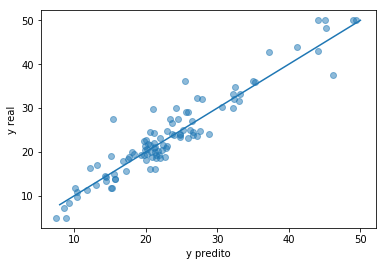

In [9]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, predictions))

# plotando as predições no teste
plt.scatter(predictions, y_test, alpha=0.5);

# plotando a reta x = y
x = np.linspace(8,50,100)
plt.plot(x,x)

plt.xlabel('y predito')
plt.ylabel('y real');

Quanto mais próximos forem os $y$ real e predito, melhor a qualidade do modelo gerado. Portanto, nesse gráfico a comparação é feita entre os pontos e a reta de 45 graus, $x=y$. Percebe-se que há uma relativa boa adequação da tendência dos dados à reta.

#### *Mão na massa! *

* Repita a modelagem realizada neste *notebook* utilizando o conjunto de dados Diabetes (informações sobre importação no scikit-learn [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)).

### Referência:

https://gogul09.github.io/software/regression-example-boston-housing-prices